# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [41]:
# Dependencies and Setup
import pandas as pd  # type: ignore
import requests  # type: ignore

# Import API key
from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Add a breakpoint here to start debugging
breakpoint()

In [42]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,marine corps base hawaii - mcbh,21.4453,-157.7513,79.45,88,64,4.00,US,1725200433
1,1,cockburn town,21.4612,-71.1419,83.98,75,95,20.49,TC,1725200434
2,2,ribeira grande,38.5167,-28.7000,77.77,57,20,17.27,PT,1725200436
3,3,enewetak,11.3474,162.3373,84.51,76,100,15.90,MH,1725200437
4,4,barhi,23.9000,80.8000,79.57,87,84,7.94,IN,1725200439
...,...,...,...,...,...,...,...,...,...,...
569,569,lamu,-2.2717,40.9020,77.41,77,15,15.90,KE,1725201100
570,570,oyama,36.3000,139.8000,81.03,83,100,7.72,JP,1725201101
571,571,tsiombe,-25.3000,45.4833,66.38,74,74,14.70,MG,1725201102
572,572,nouna,12.7333,-3.8667,81.50,78,100,9.93,BF,1725201103


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
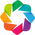

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

In [43]:
#%%capture --no-display

import pandas as pd
import hvplot.pandas  # For hvplot integration with pandas DataFrame
import holoviews as hv  # For holoviews, which provides interactive visualization
hv.extension('bokeh')  # To set up the Bokeh plotting library as the backend

# Configure the map plot
humidity_map = city_data_df.hvplot.points(
    'Lng',
    'Lat',
    geo=True, 
    tiles = 'OSM', 
    frame_width = 700, 
    frame_height = 500, 
    color='City',
    alpha= 0.5,
    s='Humidity',
    scale= 0.8)

# Display the map
humidity_map

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [44]:
# Import folium for map visualization
import folium

# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a base map centered around the mean latitude and longitude of the cities
mean_lat = city_data_df['Lat'].mean()
mean_lng = city_data_df['Lng'].mean()
map = folium.Map(location=[mean_lat, mean_lng], zoom_start=2)

# Display sample data
city_data_df.head()
city_data_df


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,marine corps base hawaii - mcbh,21.4453,-157.7513,79.45,88,64,4.00,US,1725200433
1,1,cockburn town,21.4612,-71.1419,83.98,75,95,20.49,TC,1725200434
2,2,ribeira grande,38.5167,-28.7000,77.77,57,20,17.27,PT,1725200436
3,3,enewetak,11.3474,162.3373,84.51,76,100,15.90,MH,1725200437
4,4,barhi,23.9000,80.8000,79.57,87,84,7.94,IN,1725200439
...,...,...,...,...,...,...,...,...,...,...
569,569,lamu,-2.2717,40.9020,77.41,77,15,15.90,KE,1725201100
570,570,oyama,36.3000,139.8000,81.03,83,100,7.72,JP,1725201101
571,571,tsiombe,-25.3000,45.4833,66.38,74,74,14.70,MG,1725201102
572,572,nouna,12.7333,-3.8667,81.50,78,100,9.93,BF,1725201103


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [45]:
# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Define the ideal weather conditions
ideal_temp_min = 70
ideal_temp_max = 80
max_humidity = 60
max_cloudiness = 20
# Filter the DataFrame based on these conditions
ideal_weather_df = city_data_df[
    (city_data_df['Max Temp'] >= ideal_temp_min) &
    (city_data_df['Max Temp'] <= ideal_temp_max) &
    (city_data_df['Humidity'] < max_humidity) &
    (city_data_df['Cloudiness'] < max_cloudiness)
]

# Display the resulting DataFrame
ideal_weather_df.head()
ideal_weather_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
36,36,al qubbah,32.7616,22.2424,79.65,51,3,20.33,LY,1725200475
41,41,czluchow,53.6672,17.3588,71.96,34,4,5.03,PL,1725200480
79,79,vicuna,-30.0319,-70.7081,76.32,10,0,0.94,CL,1725200523
94,94,benjamin hill,30.1667,-111.1000,77.79,48,0,5.68,MX,1725200540
117,117,luderitz,-26.6481,15.1594,74.64,43,1,10.22,NaN,1725200567
120,120,chulakkurgan,43.7650,69.1814,71.06,23,0,16.06,KZ,1725200571
131,131,toliara,-23.3500,43.6667,79.11,47,3,21.74,MG,1725200583
183,183,calvinia,-31.4707,19.7760,75.92,9,0,1.70,ZA,1725200645
207,207,leninskoye,41.7589,69.3864,75.70,24,0,14.23,KZ,1725200673
235,235,xai-xai,-25.0519,33.6442,71.46,50,2,10.27,MZ,1725200706


### Step 3: Create a new DataFrame called `hotel_df`.

In [46]:
# Use the Pandas copy function to create a DataFrame called hotel_df to store the city, country, coordinates, and humidity
# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Define the ideal weather conditions
ideal_temp_min = 70
ideal_temp_max = 80
max_humidity = 60
max_cloudiness = 20

# Filter the DataFrame based on these conditions
ideal_weather_df = city_data_df[
    (city_data_df['Max Temp'] >= ideal_temp_min) &
    (city_data_df['Max Temp'] <= ideal_temp_max) &
    (city_data_df['Humidity'] < max_humidity) &
    (city_data_df['Cloudiness'] < max_cloudiness)
]

# Use the Pandas copy function to create DataFrame called hotel_df
hotel_df = ideal_weather_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data from hotel_df
hotel_df.head()
hotel_df


,City,Country,Lat,Lng,Humidity,Hotel Name
36,al qubbah,LY,32.7616,22.2424,51,
41,czluchow,PL,53.6672,17.3588,34,
79,vicuna,CL,-30.0319,-70.7081,10,
94,benjamin hill,MX,30.1667,-111.1000,48,
117,luderitz,NaN,-26.6481,15.1594,43,
120,chulakkurgan,KZ,43.7650,69.1814,23,
131,toliara,MG,-23.3500,43.6667,47,
183,calvinia,ZA,-31.4707,19.7760,9,
207,leninskoye,KZ,41.7589,69.3864,24,
235,xai-xai,MZ,-25.0519,33.6442,50,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [47]:
#geoapify_key = ""

# Set parameters to search for a hotel
radius = 10000
params = {'categories':'accommodation.hotel',\
         'filter':'',\
         'bias':'',\
         'apiKey':geoapify_key,\
         'limit':1}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lon = row['Lng']
    lat = row['Lat']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f'circle:{lon},{lat},{radius}'
    params["bias"] = f'proximity:{lon},{lat}'
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
#         # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
#     # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# # Display sample data
hotel_df.head()

Starting hotel search
al qubbah - nearest hotel: No hotel found
czluchow - nearest hotel: No hotel found
vicuna - nearest hotel: No hotel found
benjamin hill - nearest hotel: No hotel found
luderitz - nearest hotel: Seaview Hotel Zum Sperrgebiet
chulakkurgan - nearest hotel: No hotel found
toliara - nearest hotel: Ambary
calvinia - nearest hotel: Calvinia Hotel
leninskoye - nearest hotel: No hotel found
xai-xai - nearest hotel: No hotel found
port hedland - nearest hotel: The Esplanade Hotel
queenstown - nearest hotel: Queens Hotel
inhambane - nearest hotel: Hotel de Inhambane
de aar - nearest hotel: No hotel found
buka - nearest hotel: No hotel found
pil'na - nearest hotel: No hotel found
mount isa - nearest hotel: Ibis Styles
scottburgh - nearest hotel: Blue Marlin Hotel
colares - nearest hotel: Quinta de São Tadeu
saint-francois - nearest hotel: Chez Lily
los andes - nearest hotel: Hotel Gloria
lupane - nearest hotel: No hotel found
karamay - nearest hotel: Heng Long International H

,City,Country,Lat,Lng,Humidity,Hotel Name
36,al qubbah,LY,32.7616,22.2424,51,No hotel found
41,czluchow,PL,53.6672,17.3588,34,No hotel found
79,vicuna,CL,-30.0319,-70.7081,10,No hotel found
94,benjamin hill,MX,30.1667,-111.1000,48,No hotel found
117,luderitz,NaN,-26.6481,15.1594,43,Seaview Hotel Zum Sperrgebiet


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [48]:

# Configure the map plot
hotel_found_df = hotel_df.hvplot.points('Lng',
            'Lat',
            geo=True, 
            tiles = 'OSM', 
            frame_width = 700, 
            frame_height = 500, 
            color='City',
            alpha=0.6,
            hover=True,
            hover_cols='all',
            use_index=False,
            s='Humidity',
            scale= 1.2)

# Display the map
hotel_found_df

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Country,Hotel Name)